API data exploration for 10 new Smart Lights added in March 2022.

# Setup

In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

e:\Mare5\Documents\Šola\IŠRM\ds-smart-lights


In [2]:
import src.api as API
import src.v1.config as cfg 
import src.v1.data_utils as data_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 15]

# Download data

## Download data

In [3]:
api = API.WiseAliceAPI(credentials_path=cfg.api_secrets_path)

In [4]:
api_devices = api.get_devices()
devices = [d for d in api_devices if d['name'].startswith('SmartLight')]
devices = sorted(devices, key=lambda d: int(d['name'].split()[1]))
devices_df = pd.DataFrame(devices)
devices_df['first_date'] = devices_df['uuid'].map(api.get_first_entry_date)
devices_df['last_date'] = devices_df['uuid'].map(api.get_last_entry_date)
devices_df

,active,description,id,lat,lng,master_id,name,serial,uuid,first_date,last_date
0,True,Light Number 1,8,46.525393,15.667203,None,SmartLight 1,testsmartlightserial001,78fbb64a-bf35-4c10-be5a-9763cebeb9bf,2021-06-30,2054-01-06
1,True,Light Number 2,1,46.525776,15.667063,None,SmartLight 2,testsmartlightserial002,6c7572e1-460f-43dd-b137-90c21d33525b,2021-06-08,2054-01-09
2,True,Light Number 3,9,46.526064,15.666902,None,SmartLight 3,testsmartlightserial003,362260aa-d5e7-4ffd-b3a3-19ff926a7564,2021-07-30,2054-01-25
3,True,Light Number 4,11,46.526360,15.666773,None,SmartLight 4,testsmartlightserial004,20b58d4a-d456-4d2c-b330-c291292eae53,2022-02-21,2054-01-15
4,True,Light Number 5,10,46.526832,15.666537,None,SmartLight 5,testsmartlightserial005,0d01df30-aa2c-4dda-8659-a354b840aaca,2022-01-07,2054-01-20
5,True,Light Number 6,3,46.527167,15.666419,None,SmartLight 6,testsmartlightserial006,88a97079-e4d5-4a4e-9243-295f1785ab3a,2020-12-24,2054-01-24
6,True,Light Number 7,7,46.527341,15.666570,None,SmartLight 7,testsmartlightserial007,73142ffb-e80c-4f4e-9393-426f9a2aef9c,2021-06-30,2054-01-23
7,True,Light Number 8,5,46.527427,15.667040,None,SmartLight 8,testsmartlightserial008,34b516aa-a049-4a5d-9c52-daf3803e43f2,2020-12-21,2054-01-24
8,True,Light Number 9,12,46.527575,15.667715,None,SmartLight 9,testsmartlightserial009,44d5db8d-88bf-4461-b5f3-767a32d4a3f8,2022-02-21,2025-06-26
9,True,Light Number 10,13,46.527696,15.668301,None,SmartLight 10,testsmartlightserial010,55b7bb12-c5af-41bb-96c5-8e20fec512be,2021-12-20,2054-01-05


In [ ]:
assert devices_df['id'].to_list() == cfg.device_ids
API._download_helper(api, cfg.device_ids, date_range=cfg.download_date_range, update=True)

## Check data

- Only 23 out of 70 columns contain non-null data.
- Only 3/10 devices (8,1,7) contain `luminlux` => we remove it from all
- `api.get_entries(uuid, date)` can return entries with `inserted_at` on a different `date` => we keep data only from `config.load_date_range`
- 2022-03-15 is the first date where all devices have _normal_ temperatures. Before that date, some are ok some were still in testing.

In [5]:
device_data = [API.read_entries(cfg.get_api_csv_path(id_)) for id_ in cfg.device_ids]

In [6]:
summary = {}
for id_, d in zip(cfg.device_ids, device_data):
    summary[id_] = data_utils.preprocess_api_data(d).count()
pd.DataFrame(summary)

,8,1,9,11,10,3,7,5,12,13
partpolu100gm3,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
rssi,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
radarvechnumdetect,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
typpartsize,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
partpolu010gm3,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
partpolu025nm3,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
tempc,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
powerinperc,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
partpolu005nm3,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639
entered_at,31402,16488,20109,41887,25363,22848,21760,16154,26525,20639


<AxesSubplot:xlabel='inserted_at'>

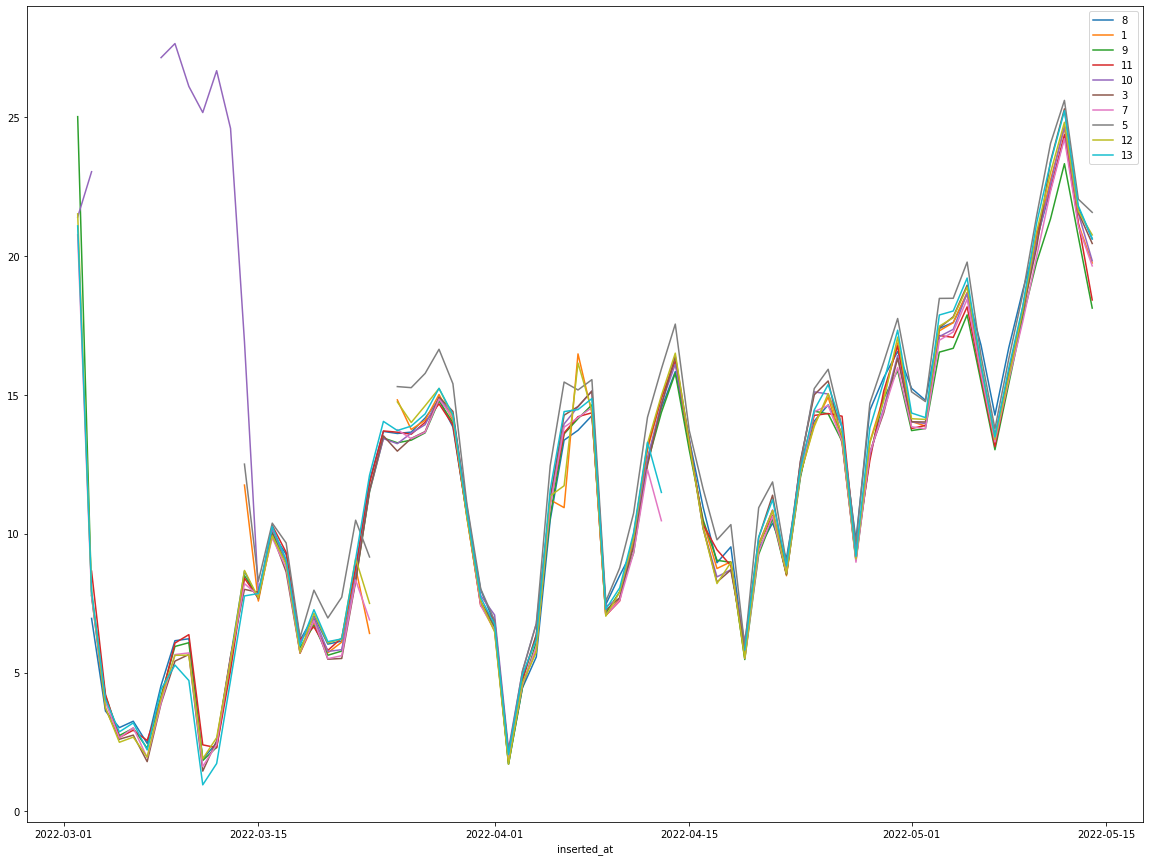

In [7]:
tmp = {}
for id_, d in zip(cfg.device_ids, device_data):
    d = d.loc[d['inserted_at'].dt.date > pd.Timestamp(2022,3,1).date()]
    tmp[id_] = d['tempc'].groupby(d['inserted_at'].dt.date).mean()
pd.DataFrame(tmp).plot()

## ARSO data

Google Drive [link](https://drive.google.com/file/d/1VyF6CW2aNJeB4KAbjQl-4VzqNI4oQqbz/view?usp=sharing).

In [ ]:
# Run first time only
# data_utils._merge_arso_csv_data()

In [8]:
gt = data_utils.load_arso_data()
gt

,station,date,tempc,relhumperc
date,,,,
2022-03-15 00:00:00,MARIBOR - VRBANSKI PLATO,2022-03-15 00:00:00,1.4,68
2022-03-15 00:10:00,MARIBOR - VRBANSKI PLATO,2022-03-15 00:10:00,0.7,72
2022-03-15 00:20:00,MARIBOR - VRBANSKI PLATO,2022-03-15 00:20:00,0.7,72
2022-03-15 00:30:00,MARIBOR - VRBANSKI PLATO,2022-03-15 00:30:00,0.7,72
2022-03-15 00:40:00,MARIBOR - VRBANSKI PLATO,2022-03-15 00:40:00,1.7,67
...,...,...,...,...
2022-05-12 22:50:00,MARIBOR - VRBANSKI PLATO,2022-05-12 22:50:00,15.9,81
2022-05-12 23:00:00,MARIBOR - VRBANSKI PLATO,2022-05-12 23:00:00,15.6,82
2022-05-12 23:10:00,MARIBOR - VRBANSKI PLATO,2022-05-12 23:10:00,15.2,83


<AxesSubplot:xlabel='date'>

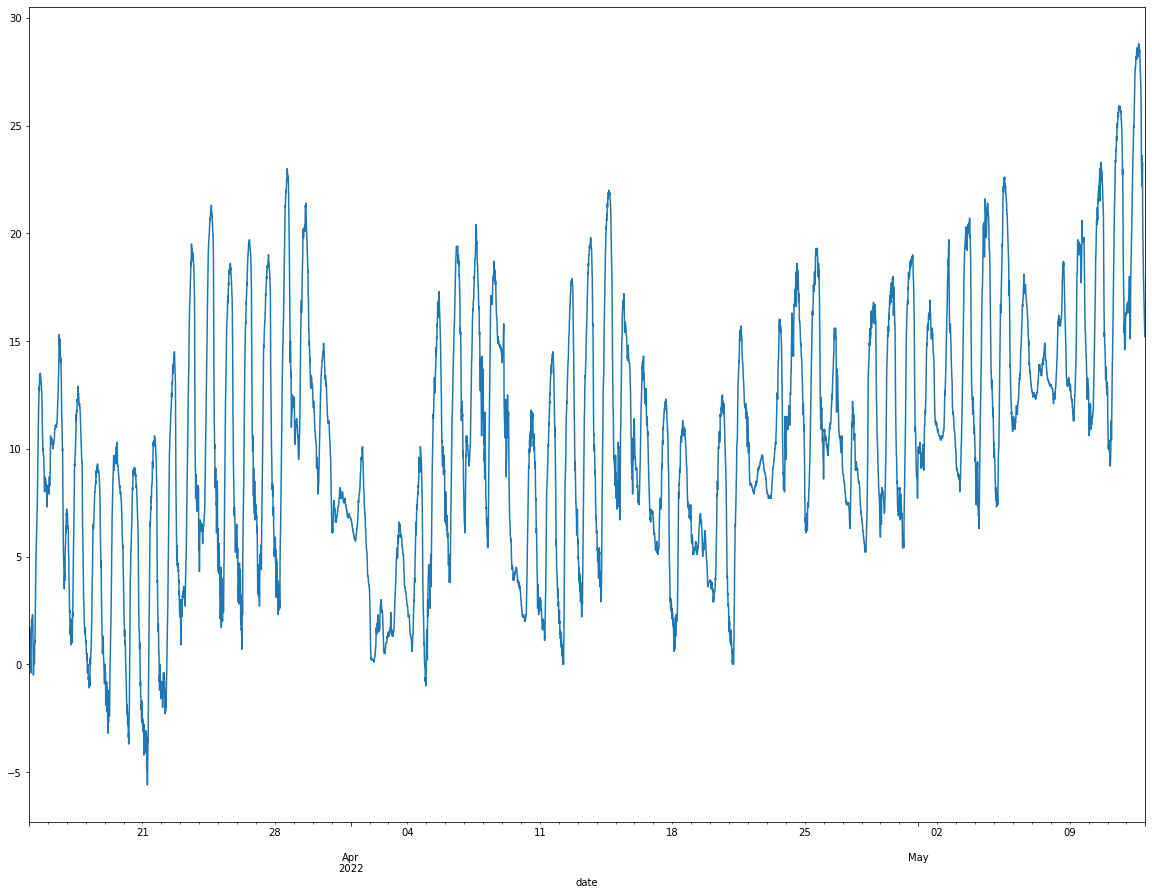

In [9]:
gt['tempc'].plot()

# Data

Preprocessed data analysis.

In [10]:
X = data_utils.load_api_data(cfg.device_ids, preprocess=True, include_device_src=True)

## Temperature

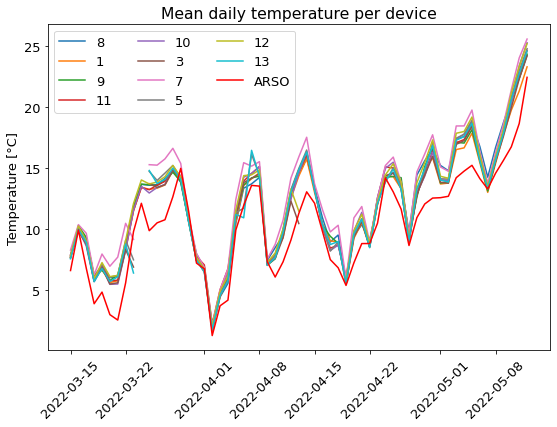

In [42]:
plt.rcParams.update({'font.size': 13})
tmp = {}
fig, ax = plt.subplots(figsize=(9,6))
for id_ in cfg.device_ids:
    d = X.loc[X['device_id'] == id_]
    tmp[id_] = d['tempc'].groupby(d['inserted_at'].dt.date).mean()
ax = pd.DataFrame(tmp).plot(ax=ax, rot=45, title="Mean daily temperature per device")
ax.plot(gt['tempc'].groupby(gt['date'].dt.date).mean(), color='red', label='ARSO')
ax.set_ylabel('Temperature [°C]')
ax.legend(ncol=3)
ax.get_xaxis().get_label().set_visible(False)
fig.savefig("./figs/new_tempc_mean_daily.pdf", bbox_inches="tight")

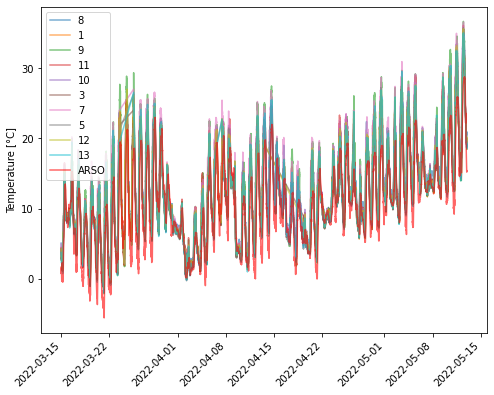

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
for id_ in cfg.device_ids:
    d = X.loc[X['device_id'] == id_]
    ax.plot(d['tempc'], label=id_, alpha=0.6)
ax.plot(gt['tempc'], color='red', label='ARSO', alpha=0.6)
ax.set_ylabel('Temperature [°C]')
plt.xticks(rotation=45, ha='right')
ax.legend()

<AxesSubplot:title={'center':'Monthly temperature'}, xlabel='month', ylabel='Temperature [°C]'>

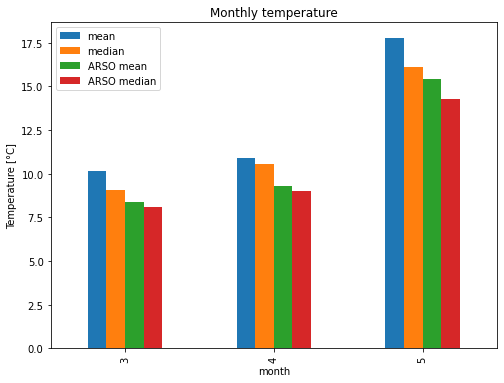

In [20]:
pd.DataFrame({
    'mean': X.groupby(X['inserted_at'].dt.month)["tempc"].mean(),
    'median': X.groupby(X['inserted_at'].dt.month)["tempc"].median(),
    'ARSO mean': gt.groupby(gt['date'].dt.month)["tempc"].mean(),
    'ARSO median': gt.groupby(gt['date'].dt.month)["tempc"].median(),
}).plot.bar(xlabel='month', ylabel='Temperature [°C]', figsize=(8,6), title='Monthly temperature')

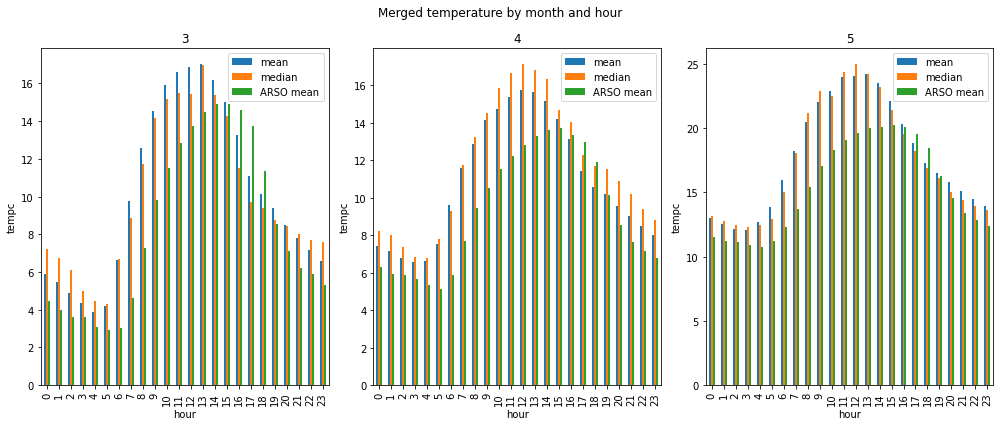

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6), squeeze=False)
for (month, df), (_, gf) in zip(X.groupby(X['inserted_at'].dt.month), gt.groupby(gt['date'].dt.month)):
    pd.DataFrame({
        'mean': df.groupby(df['inserted_at'].dt.hour)['tempc'].mean(),
        'median': df.groupby(df['inserted_at'].dt.hour)['tempc'].median(),
        'ARSO mean': gf.groupby(gf['date'].dt.hour)['tempc'].mean(),
    }).plot.bar(ax=axs.flatten()[month-3], ylabel='tempc', xlabel='hour', title=str(month))
fig.suptitle('Merged temperature by month and hour')
fig.tight_layout()

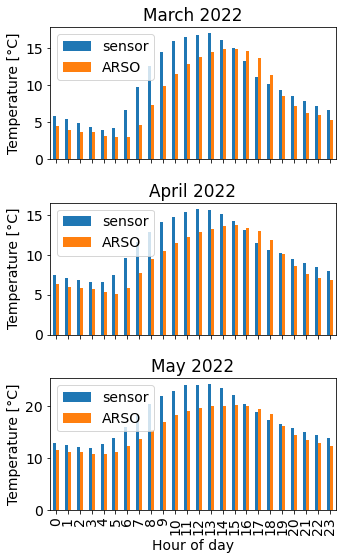

In [33]:
# For report...
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(3, 1, figsize=(5, 8), squeeze=False, sharex=True)
month_map = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for (month, df), (_, gf) in zip(X.groupby(X['inserted_at'].dt.month), gt.groupby(gt['date'].dt.month)):
    pd.DataFrame({
        'sensor': df.groupby(df['inserted_at'].dt.hour)['tempc'].mean(),
        #'sensor median': df.groupby(df['inserted_at'].dt.hour)['tempc'].median(),
        'ARSO': gf.groupby(gf['date'].dt.hour)['tempc'].mean(),
    }).plot.bar(ax=axs.flatten()[month-3], ylabel='Temperature [°C]', xlabel='Hour of day', title=month_map[month-1] + " 2022")
# fig.suptitle('Average temperature grouped monthly and hourly')
fig.tight_layout()
fig.savefig('./figs/new_tempc_hour_month.pdf', bbox_inches='tight')

## Relative humidity percent

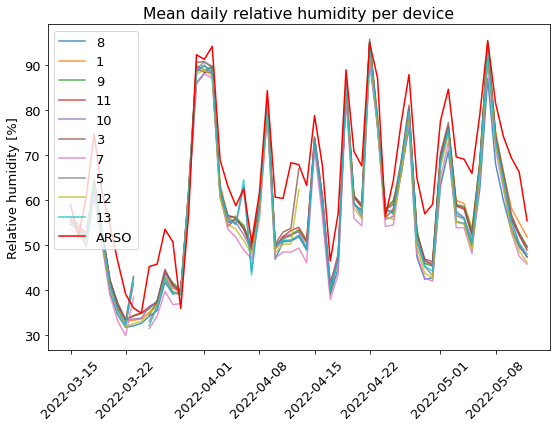

In [41]:
plt.rcParams.update({'font.size': 13})
tmp = {}
fig, ax = plt.subplots(figsize=(9,6))
for id_ in cfg.device_ids:
    d = X.loc[X['device_id'] == id_]
    tmp[id_] = d['relhumperc'].groupby(d['inserted_at'].dt.date).mean()
ax = pd.DataFrame(tmp).plot(ax=ax, rot=45, title="Mean daily relative humidity per device", alpha=0.8)
ax.plot(gt['relhumperc'].groupby(gt['date'].dt.date).mean(), color='red', label='ARSO')
ax.set_ylabel('Relative humidity [%]')
ax.legend()
ax.get_xaxis().get_label().set_visible(False)
fig.savefig("./figs/new_relhumperc_mean_daily.pdf", bbox_inches="tight")

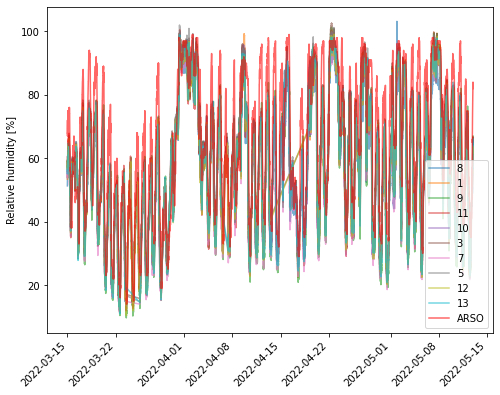

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
for id_ in cfg.device_ids:
    d = X.loc[X['device_id'] == id_]
    ax.plot(d['relhumperc'], label=id_, alpha=0.6)
ax.plot(gt['relhumperc'], color='red', label='ARSO', alpha=0.6)
ax.set_ylabel('Relative humidity [%]')
plt.xticks(rotation=45, ha='right')
ax.legend()

<AxesSubplot:title={'center':'Relative humidity grouped by month'}, xlabel='month', ylabel='Relative humidity [%]'>

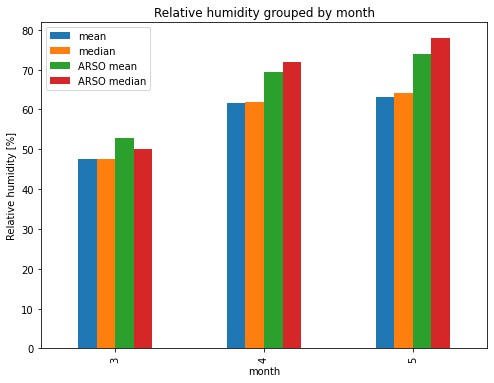

In [24]:
pd.DataFrame({
    'mean': X.groupby(X['inserted_at'].dt.month)["relhumperc"].mean(),
    'median': X.groupby(X['inserted_at'].dt.month)["relhumperc"].median(),
    'ARSO mean': gt.groupby(gt['date'].dt.month)["relhumperc"].mean(),
    'ARSO median': gt.groupby(gt['date'].dt.month)["relhumperc"].median(),
}).plot.bar(xlabel='month', ylabel='Relative humidity [%]', figsize=(8,6), title='Relative humidity grouped by month')

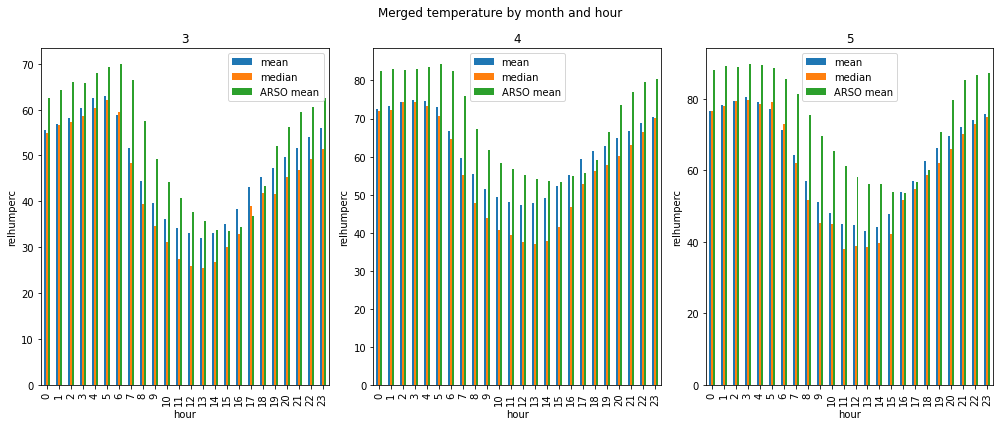

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(14, 6), squeeze=False)
for (month, df), (_, gf) in zip(X.groupby(X['inserted_at'].dt.month), gt.groupby(gt['date'].dt.month)):
    pd.DataFrame({
        'mean': df.groupby(df['inserted_at'].dt.hour)['relhumperc'].mean(),
        'median': df.groupby(df['inserted_at'].dt.hour)['relhumperc'].median(),
        'ARSO mean': gf.groupby(gf['date'].dt.hour)['relhumperc'].mean(),
    }).plot.bar(ax=axs.flatten()[month-3], ylabel='relhumperc', xlabel='hour', title=str(month))
fig.suptitle('Merged temperature by month and hour')
fig.tight_layout()

## Pressure [mbar]

IMPORTANT: ARSO station `Maribor - Vrbanski plato` doesn't contain pressure measurements!

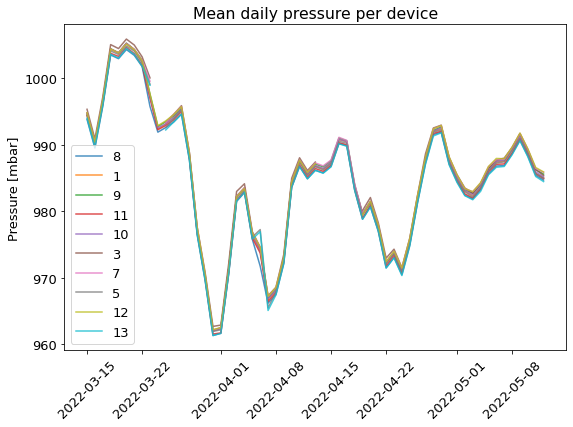

In [12]:
plt.rcParams.update({'font.size': 13})
tmp = {}
fig, ax = plt.subplots(figsize=(9,6))
for id_ in cfg.device_ids:
    d = X.loc[X['device_id'] == id_]
    tmp[id_] = d['pressmbar'].groupby(d['inserted_at'].dt.date).mean()
ax = pd.DataFrame(tmp).plot(ax=ax, rot=45, title="Mean daily pressure per device", alpha=0.8)
# ax.plot(gt['pressmbar'].groupby(gt['date'].dt.date).mean(), color='red', label='ARSO')
ax.set_ylabel('Pressure [mbar]')
ax.legend()
ax.get_xaxis().get_label().set_visible(False)
fig.savefig("./figs/new_pressmbar_mean_daily.pdf", bbox_inches="tight")

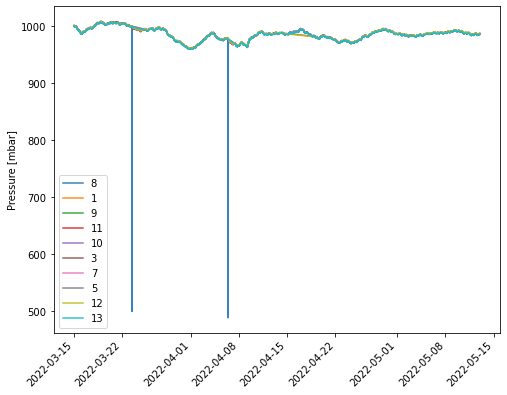

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for id_ in cfg.device_ids:
    d = X.loc[X['device_id'] == id_]
    ax.plot(d['pressmbar'], label=id_, alpha=0.9)
# ax.plot(gt['pressmbar'], color='red', label='ARSO', alpha=0.6)
ax.set_ylabel('Pressure [mbar]')
plt.xticks(rotation=45, ha='right')
ax.legend()